In [2]:
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pylab as plt

from glob import glob

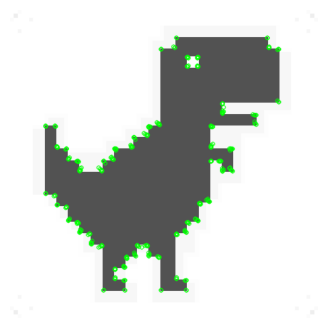

(< cv2.KeyPoint 0000020C147C94D0>, < cv2.KeyPoint 0000020C144BB6F0>, < cv2.KeyPoint 0000020C726F4DE0>, < cv2.KeyPoint 0000020C7258DD10>, < cv2.KeyPoint 0000020C7258D050>, < cv2.KeyPoint 0000020C7258D8C0>, < cv2.KeyPoint 0000020C7258E2B0>, < cv2.KeyPoint 0000020C7258E4C0>, < cv2.KeyPoint 0000020C7258E130>, < cv2.KeyPoint 0000020C1484E970>, < cv2.KeyPoint 0000020C1484F9F0>, < cv2.KeyPoint 0000020C1484F810>, < cv2.KeyPoint 0000020C146B28E0>, < cv2.KeyPoint 0000020C145B42D0>, < cv2.KeyPoint 0000020C145B63A0>, < cv2.KeyPoint 0000020C1468D7A0>, < cv2.KeyPoint 0000020C144E5620>, < cv2.KeyPoint 0000020C14876AC0>, < cv2.KeyPoint 0000020C14876AF0>, < cv2.KeyPoint 0000020C148773C0>, < cv2.KeyPoint 0000020C148765B0>, < cv2.KeyPoint 0000020C14876D60>, < cv2.KeyPoint 0000020C14876D30>, < cv2.KeyPoint 0000020C14877750>, < cv2.KeyPoint 0000020C14877630>, < cv2.KeyPoint 0000020C14877480>, < cv2.KeyPoint 0000020C14877600>, < cv2.KeyPoint 0000020C148775D0>, < cv2.KeyPoint 0000020C14877690>, < cv2.KeyPoin

In [3]:
file = glob('./imgs/dinos/dino-1.png')[0]
image = cv.imread(file)
orb = cv.ORB_create()
keypoints, descriptors = orb.detectAndCompute(image, None)

image_with_keypoints = cv.drawKeypoints(image, keypoints, None, color=(0, 255, 0), flags=0)

fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(image_with_keypoints)
ax.axis('off')
plt.show()
print(keypoints)

bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

[< cv2.DMatch 0000020C148564B0>, < cv2.DMatch 0000020C14856430>, < cv2.DMatch 0000020C148563B0>, < cv2.DMatch 0000020C14857410>, < cv2.DMatch 0000020C14857670>, < cv2.DMatch 0000020C148563D0>, < cv2.DMatch 0000020C14854D70>, < cv2.DMatch 0000020C14857550>, < cv2.DMatch 0000020C148574F0>, < cv2.DMatch 0000020C14857630>, < cv2.DMatch 0000020C148574D0>, < cv2.DMatch 0000020C14856490>, < cv2.DMatch 0000020C148576D0>, < cv2.DMatch 0000020C148550D0>, < cv2.DMatch 0000020C148575D0>, < cv2.DMatch 0000020C148569D0>, < cv2.DMatch 0000020C14856410>, < cv2.DMatch 0000020C148575B0>, < cv2.DMatch 0000020C14857590>, < cv2.DMatch 0000020C148562D0>, < cv2.DMatch 0000020C7FD03EF0>, < cv2.DMatch 0000020C14856370>, < cv2.DMatch 0000020C14857650>, < cv2.DMatch 0000020C148562F0>, < cv2.DMatch 0000020C14857870>, < cv2.DMatch 0000020C14856330>, < cv2.DMatch 0000020C14857530>, < cv2.DMatch 0000020C148565F0>, < cv2.DMatch 0000020C148575F0>, < cv2.DMatch 0000020C14857570>, < cv2.DMatch 0000020C14856570>, < cv2.D

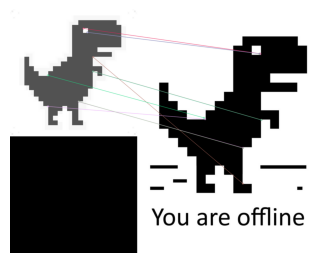

(< cv2.KeyPoint 0000020C147C94D0>, < cv2.KeyPoint 0000020C144BB6F0>, < cv2.KeyPoint 0000020C726F4DE0>, < cv2.KeyPoint 0000020C7258DD10>, < cv2.KeyPoint 0000020C7258D050>, < cv2.KeyPoint 0000020C7258D8C0>, < cv2.KeyPoint 0000020C7258E2B0>, < cv2.KeyPoint 0000020C7258E4C0>, < cv2.KeyPoint 0000020C7258E130>, < cv2.KeyPoint 0000020C1484E970>, < cv2.KeyPoint 0000020C1484F9F0>, < cv2.KeyPoint 0000020C1484F810>, < cv2.KeyPoint 0000020C146B28E0>, < cv2.KeyPoint 0000020C145B42D0>, < cv2.KeyPoint 0000020C145B63A0>, < cv2.KeyPoint 0000020C1468D7A0>, < cv2.KeyPoint 0000020C144E5620>, < cv2.KeyPoint 0000020C14876AC0>, < cv2.KeyPoint 0000020C14876AF0>, < cv2.KeyPoint 0000020C148773C0>, < cv2.KeyPoint 0000020C148765B0>, < cv2.KeyPoint 0000020C14876D60>, < cv2.KeyPoint 0000020C14876D30>, < cv2.KeyPoint 0000020C14877750>, < cv2.KeyPoint 0000020C14877630>, < cv2.KeyPoint 0000020C14877480>, < cv2.KeyPoint 0000020C14877600>, < cv2.KeyPoint 0000020C148775D0>, < cv2.KeyPoint 0000020C14877690>, < cv2.KeyPoin

In [4]:
image1 = cv.imread('./imgs/dinos/dino-1.png')
image2 = cv.imread('./imgs/dinos/dino-2.jpg')
orb = cv.ORB_create()
keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(image2, None)

bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Encontrar correspondências
matches = bf.match(descriptors1, descriptors2)

# Ordenar correspondências pelo menor distância
matches = sorted(matches, key=lambda x: x.distance)
print(matches)

matched_image = cv.drawMatches(
    image1, keypoints1, image2, keypoints2, matches[:10], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(matched_image)
ax.axis('off')
plt.show()
print(keypoints)

Shape similarity score: 9.303668946358812e-14


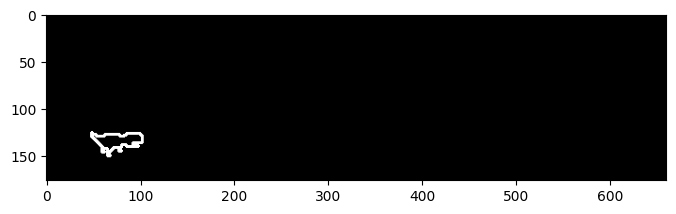

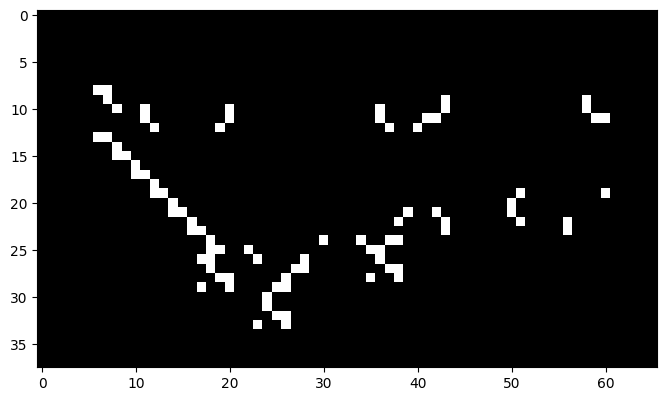

In [33]:
image1 = cv.imread('./imgs/dinos/teste.png',  cv.IMREAD_GRAYSCALE)
image2 = cv.imread('./imgs/dinos/dino_down.png',  cv.IMREAD_GRAYSCALE)

_, binary1 = cv.threshold(image1, 127, 255, cv.THRESH_BINARY)
_, binary2 = cv.threshold(image2, 127, 255, cv.THRESH_BINARY)

# Find contours
contours_raw_1, _ = cv.findContours(binary1, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contours_raw_2, _ = cv.findContours(binary2, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contours1 = []
contours2 = []

for contour in contours_raw_1:
    x, y, w, h = cv.boundingRect(contour)
    if w > 20 and h > 20:
        contours1.append(contour)

for contour in contours_raw_2:
    x, y, w, h = cv.boundingRect(contour)
    if w > 20 and h > 20:
        contours2.append(contour)   

# Assuming you want to match the first contour in both images
contour1 = contours1[0]
contour2 = contours2[0]

# Compare contours using matchShapes
similarity = cv.matchShapes(contour1, contour2, cv.CONTOURS_MATCH_I1, 0)
print(f"Shape similarity score: {similarity}")

blank_dino_image = np.zeros_like(binary2)
cv.drawContours(blank_dino_image, contour2, -1, (255, 255, 255), thickness=1)



blank_image = np.zeros_like(binary1)
cv.drawContours(blank_image, [contour1], -1, (255, 255, 255), thickness=2)

fig, ax = plt.subplots(figsize=(8, 8))
plt.imshow(blank_image, cmap="gray")
plt.show()

fig, ax = plt.subplots(figsize=(8, 8))
plt.imshow(blank_dino_image, cmap="gray")
plt.show()

10 files loades
========Image-0=========
Original  \  Processed


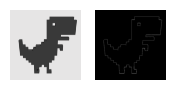

0 34: area = 727.5 aspect ratio = 1.0308747855917668 perimeter = 6119.727045416832
/Similarity: 1.8049040393405207


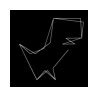

========Image-1=========
Original  \  Processed


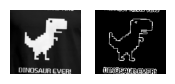

1 16: area = 280.5 aspect ratio = 3.4615384615384617 perimeter = 196.81118214130402
/Similarity: 2.878669522877635


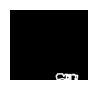

1 26: area = 874.0 aspect ratio = 4.75 perimeter = 196.85281229019165
/Similarity: 2.509694447097489


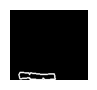

1 29: area = 3952.0 aspect ratio = 1.0208333333333333 perimeter = 531.82337474823
/Similarity: 0.5317573721802289


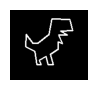

1 30: area = 4199.0 aspect ratio = 1.0309278350515463 perimeter = 496.73506212234497
/Similarity: 0.47909052852579714


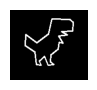

========Image-2=========
Original  \  Processed


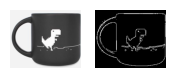

2 44: area = 191.0 aspect ratio = 5.714285714285714 perimeter = 173.5979790687561
/Similarity: 3.6513674499929505


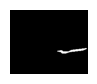

2 58: area = 45.0 aspect ratio = 1.0869565217391304 perimeter = 360.45079135894775
/Similarity: 2.808214017757091


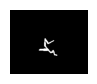

2 64: area = 40.0 aspect ratio = 0.4603174603174603 perimeter = 270.85281229019165
/Similarity: 2.2968180667853604


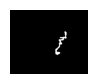

2 82: area = 82.5 aspect ratio = 0.611764705882353 perimeter = 335.09545290470123
/Similarity: 2.180646016598844


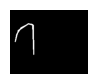

2 97: area = 466.5 aspect ratio = 1.3312101910828025 perimeter = 1219.9625457525253
/Similarity: 2.1300792477751727


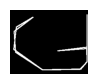

2 101: area = 96.0 aspect ratio = 69.5 perimeter = 281.79898953437805
/Similarity: 2.3430168574810892


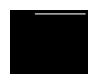

========Image-3=========
Original  \  Processed


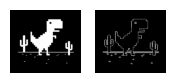

3 26: area = 13311.5 aspect ratio = 1.546583850931677 perimeter = 1748.0315254926682
/Similarity: 0.9570594093755993


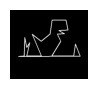

3 27: area = 14270.0 aspect ratio = 1.5276073619631902 perimeter = 1698.7005722522736
/Similarity: 0.9099702367659126


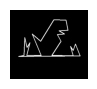

========Image-4=========
Original  \  Processed


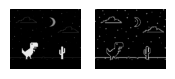

4 38: area = 664.5 aspect ratio = 0.4807692307692308 perimeter = 213.35533845424652
/Similarity: 0.5435988939559246


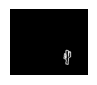

4 39: area = 825.5 aspect ratio = 2.090909090909091 perimeter = 596.0660153627396
/Similarity: 0.34307376632824904


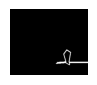

4 45: area = 1952.5 aspect ratio = 0.9705882352941176 perimeter = 351.63960921764374
/Similarity: 0.49021497675929604


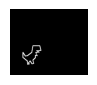

4 46: area = 2096.0 aspect ratio = 1.2857142857142858 perimeter = 408.45079135894775
/Similarity: 0.41324085660523835


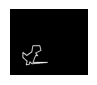

4 77: area = 13.0 aspect ratio = 4.857142857142857 perimeter = 210.22539567947388
/Similarity: 246.8856782719298


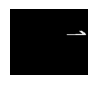

========Image-5=========
Original  \  Processed


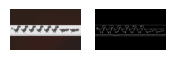

5 0: area = 25.0 aspect ratio = 298.0 perimeter = 1196.6274166107178
/Similarity: 1.6549687352213986


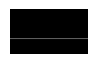

5 17: area = 610.0 aspect ratio = 54.18181818181818 perimeter = 1224.0832602977753
/Similarity: 1.8775441550801684


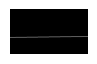

5 54: area = 1360.5 aspect ratio = 2.1944444444444446 perimeter = 239.29646337032318
/Similarity: 0.768754940636653


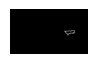

5 57: area = 32.0 aspect ratio = 2.1052631578947367 perimeter = 568.9360725879669
/Similarity: 2.1014994410816215


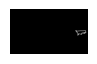

5 60: area = 1421.0 aspect ratio = 2.1052631578947367 perimeter = 308.911687374115
/Similarity: 0.7563100296363503


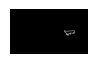

5 63: area = 50.5 aspect ratio = 1.024390243902439 perimeter = 301.92387998104095
/Similarity: 2.6262260858227955


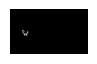

5 84: area = 1344.5 aspect ratio = 0.9193548387096774 perimeter = 226.61017167568207
/Similarity: 0.6467471041006916


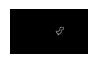

5 85: area = 1340.5 aspect ratio = 0.9193548387096774 perimeter = 227.78174459934235
/Similarity: 0.6599513506256323


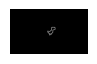

5 86: area = 1263.5 aspect ratio = 1.0 perimeter = 224.61017167568207
/Similarity: 0.707036849058001


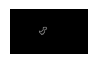

5 87: area = 1320.0 aspect ratio = 0.9354838709677419 perimeter = 247.68123936653137
/Similarity: 0.7085554025964662


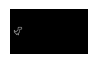

5 88: area = 1422.0 aspect ratio = 0.9365079365079365 perimeter = 316.2253956794739
/Similarity: 0.6239876609235362


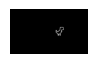

5 89: area = 1431.0 aspect ratio = 0.9206349206349206 perimeter = 312.56854152679443
/Similarity: 0.6331229309424189


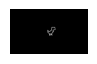

5 90: area = 1361.5 aspect ratio = 0.9206349206349206 perimeter = 325.63960921764374
/Similarity: 0.6623189545186565


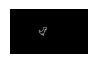

5 91: area = 91.0 aspect ratio = 0.9206349206349206 perimeter = 526.5929267406464
/Similarity: 2.6060258986580793


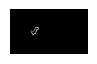

5 92: area = 35.5 aspect ratio = 1.2424242424242424 perimeter = 254.6690467596054
/Similarity: 3.4855464944118597


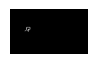

5 93: area = 1401.0 aspect ratio = 0.9206349206349206 perimeter = 324.56854152679443
/Similarity: 0.6375322808692809


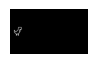

========Image-6=========
Original  \  Processed


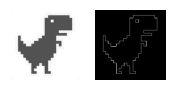

6 4: area = 25383.0 aspect ratio = 0.924901185770751 perimeter = 1301.6812393665314
/Similarity: 0.5338601622959691


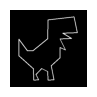

6 6: area = 25587.0 aspect ratio = 0.924901185770751 perimeter = 1335.0538227558136
/Similarity: 0.5290541799599902


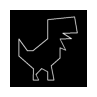

========Image-7=========
Original  \  Processed


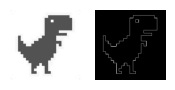

7 2: area = 25388.0 aspect ratio = 0.924901185770751 perimeter = 1296.1665205955505
/Similarity: 0.5336086365467125


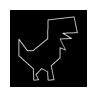

7 3: area = 25586.5 aspect ratio = 0.924901185770751 perimeter = 1333.6396092176437
/Similarity: 0.5290179025865442


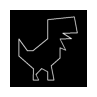

========Image-8=========
Original  \  Processed


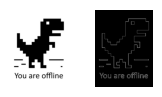

8 23: area = 238.5 aspect ratio = 0.8333333333333334 perimeter = 180.1248904466629
/Similarity: 2.6876433784421496


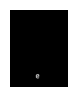

8 26: area = 234.5 aspect ratio = 0.7666666666666667 perimeter = 162.81118214130402
/Similarity: 2.4210337650725844


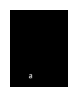

8 27: area = 260.5 aspect ratio = 0.8 perimeter = 150.18376553058624
/Similarity: 2.9300656058354813


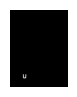

8 29: area = 300.0 aspect ratio = 0.8333333333333334 perimeter = 152.76955199241638
/Similarity: 2.249053240955397


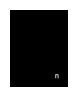

8 33: area = 280.0 aspect ratio = 0.8 perimeter = 152.28427076339722
/Similarity: 2.490548997779074


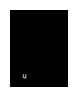

8 48: area = 277.0 aspect ratio = 0.7073170731707317 perimeter = 150.22539567947388
/Similarity: 2.7727399912740864


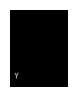

8 50: area = 572.0 aspect ratio = 1.0227272727272727 perimeter = 344.71067690849304
/Similarity: 3.0668422450711663


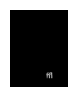

8 51: area = 682.5 aspect ratio = 1.0454545454545454 perimeter = 359.1543279886246
/Similarity: 2.142041842745003


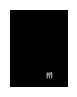

8 61: area = 758.5 aspect ratio = 13.75 perimeter = 229.89949476718903
/Similarity: 10.164929869412088


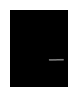

8 63: area = 770.0 aspect ratio = 13.875 perimeter = 234.0
/Similarity: 9.697750587778703


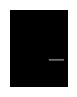

8 70: area = 55496.5 aspect ratio = 0.9442970822281167 perimeter = 2092.5512965917587
/Similarity: 0.607246876424381


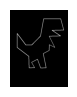

8 71: area = 56516.5 aspect ratio = 0.941952506596306 perimeter = 2133.6396092176437
/Similarity: 0.5964012906812501


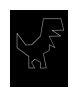

========Image-9=========
Original  \  Processed


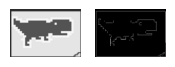

9 58: area = 149.0 aspect ratio = 0.010101010101010102 perimeter = 395.65685415267944
/Similarity: 2.1889143166846843


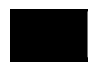

In [6]:
dino_files = glob('./imgs/dinos/*') #png gives an array of 0 and 1?
print(f"{len(dino_files)} files loades")
standup_dino = cv.imread('./imgs/dinos/dino-1.png',  cv.IMREAD_GRAYSCALE)
_, standup_dino_binary = cv.threshold(standup_dino, 127, 255, cv.THRESH_BINARY)
standup_dino_contour, _ = cv.findContours(standup_dino_binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
standup_dino_contour = standup_dino_contour[0]
list_area = []
list_perimeter = []
list_aspect_ratio = []
list_approx = []

for index_img, file in enumerate(dino_files):
    img = cv.imread(file)
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    #blurred_image = cv.GaussianBlur(img_gray, (3, 3), 0)
    image_resized = cv.resize(img_gray, None, fx=0.60, fy=0.60)

    kernel_sharpening = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    img_sharpened = cv.filter2D(image_resized, -1, kernel_sharpening)

    eightbit = np.uint8(np.absolute(img_sharpened))#8-bit vallues within range 0 to 255

    _, binary = cv.threshold(eightbit, 30, 255, cv.THRESH_BINARY)
    
    print(f"========Image-{index_img}=========")
    print("Original  \\  Processed")
    fig, ax = plt.subplots(1, 2, figsize=(2,1))
    ax[0].imshow(img)
    ax[1].imshow(binary, cmap='gray')
    ax[0].axis('off')
    ax[1].axis('off')
    plt.show()
    
    contours, hierarchy = cv.findContours(binary, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)#cv.RETR_EXTERNAL pega só o contorno mais externo 
    
    
    for index, contour in enumerate(contours):
        
        x, y, w, h = cv.boundingRect(contour)
        
        area = cv.contourArea(contour)
        aspect_ratio = w / float(h)
        perimeter = cv.arcLength(contour, True)
        approx = cv.approxPolyDP(contour, 0.01 * perimeter, True)
        
        if area > 10 and perimeter > 150:
            
            
            list_area.append(area)
            list_aspect_ratio.append(aspect_ratio)
            list_perimeter.append(perimeter)
            list_approx.append(approx)
            
            print(f"{index_img} {index}: area = {area} aspect ratio = {aspect_ratio} perimeter = {perimeter}")
            
            canvas = np.zeros_like(binary)
            cv.drawContours(canvas, [approx], -1, (255, 255, 255), thickness=2)
            similarity = cv.matchShapes(standup_dino_contour, contour, cv.CONTOURS_MATCH_I1, 0)
            print(f"/Similarity: {similarity}")
            fig, ax = plt.subplots(figsize=(1, 1))
            ax.imshow(canvas, cmap='gray')
            ax.axis('off')
            plt.show()
    print(f"========================")


10 files loades
========Image-0=========
Original  \  Processed


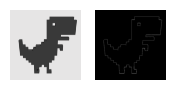

0 34: area = 727.5 aspect ratio = 1.0308747855917668 perimeter = 6119.727045416832


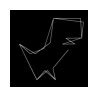

========Image-1=========
Original  \  Processed


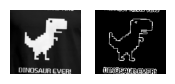

1 16: area = 280.5 aspect ratio = 3.4615384615384617 perimeter = 196.81118214130402


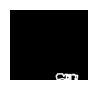

1 26: area = 874.0 aspect ratio = 4.75 perimeter = 196.85281229019165


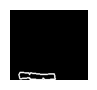

1 29: area = 3952.0 aspect ratio = 1.0208333333333333 perimeter = 531.82337474823


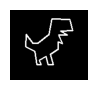

1 30: area = 4199.0 aspect ratio = 1.0309278350515463 perimeter = 496.73506212234497


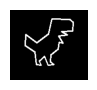

========Image-2=========
Original  \  Processed


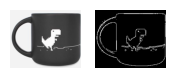

2 44: area = 191.0 aspect ratio = 5.714285714285714 perimeter = 173.5979790687561


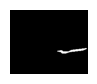

2 58: area = 45.0 aspect ratio = 1.0869565217391304 perimeter = 360.45079135894775


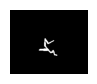

2 64: area = 40.0 aspect ratio = 0.4603174603174603 perimeter = 270.85281229019165


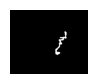

2 82: area = 82.5 aspect ratio = 0.611764705882353 perimeter = 335.09545290470123


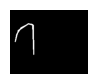

2 97: area = 466.5 aspect ratio = 1.3312101910828025 perimeter = 1219.9625457525253


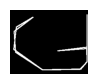

2 101: area = 96.0 aspect ratio = 69.5 perimeter = 281.79898953437805


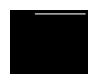

========Image-3=========
Original  \  Processed


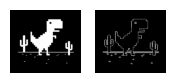

3 26: area = 13311.5 aspect ratio = 1.546583850931677 perimeter = 1748.0315254926682


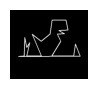

3 27: area = 14270.0 aspect ratio = 1.5276073619631902 perimeter = 1698.7005722522736


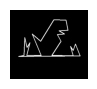

========Image-4=========
Original  \  Processed


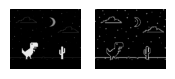

4 38: area = 664.5 aspect ratio = 0.4807692307692308 perimeter = 213.35533845424652


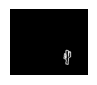

4 39: area = 825.5 aspect ratio = 2.090909090909091 perimeter = 596.0660153627396


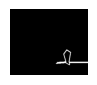

4 45: area = 1952.5 aspect ratio = 0.9705882352941176 perimeter = 351.63960921764374


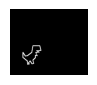

4 46: area = 2096.0 aspect ratio = 1.2857142857142858 perimeter = 408.45079135894775


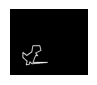

4 77: area = 13.0 aspect ratio = 4.857142857142857 perimeter = 210.22539567947388


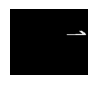

========Image-5=========
Original  \  Processed


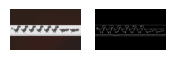

5 0: area = 25.0 aspect ratio = 298.0 perimeter = 1196.6274166107178


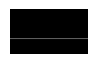

5 17: area = 610.0 aspect ratio = 54.18181818181818 perimeter = 1224.0832602977753


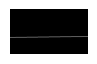

5 54: area = 1360.5 aspect ratio = 2.1944444444444446 perimeter = 239.29646337032318


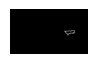

5 57: area = 32.0 aspect ratio = 2.1052631578947367 perimeter = 568.9360725879669


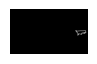

5 60: area = 1421.0 aspect ratio = 2.1052631578947367 perimeter = 308.911687374115


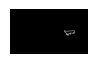

5 63: area = 50.5 aspect ratio = 1.024390243902439 perimeter = 301.92387998104095


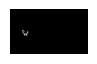

5 84: area = 1344.5 aspect ratio = 0.9193548387096774 perimeter = 226.61017167568207


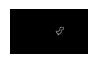

5 85: area = 1340.5 aspect ratio = 0.9193548387096774 perimeter = 227.78174459934235


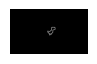

5 86: area = 1263.5 aspect ratio = 1.0 perimeter = 224.61017167568207


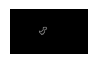

5 87: area = 1320.0 aspect ratio = 0.9354838709677419 perimeter = 247.68123936653137


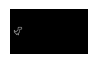

5 88: area = 1422.0 aspect ratio = 0.9365079365079365 perimeter = 316.2253956794739


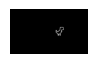

5 89: area = 1431.0 aspect ratio = 0.9206349206349206 perimeter = 312.56854152679443


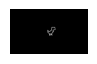

5 90: area = 1361.5 aspect ratio = 0.9206349206349206 perimeter = 325.63960921764374


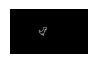

5 91: area = 91.0 aspect ratio = 0.9206349206349206 perimeter = 526.5929267406464


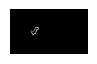

5 92: area = 35.5 aspect ratio = 1.2424242424242424 perimeter = 254.6690467596054


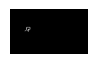

5 93: area = 1401.0 aspect ratio = 0.9206349206349206 perimeter = 324.56854152679443


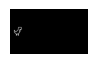

========Image-6=========
Original  \  Processed


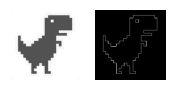

6 4: area = 25383.0 aspect ratio = 0.924901185770751 perimeter = 1301.6812393665314


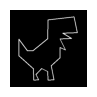

6 6: area = 25587.0 aspect ratio = 0.924901185770751 perimeter = 1335.0538227558136


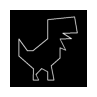

========Image-7=========
Original  \  Processed


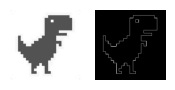

7 2: area = 25388.0 aspect ratio = 0.924901185770751 perimeter = 1296.1665205955505


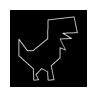

7 3: area = 25586.5 aspect ratio = 0.924901185770751 perimeter = 1333.6396092176437


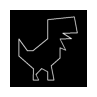

========Image-8=========
Original  \  Processed


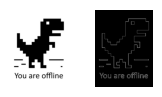

8 23: area = 238.5 aspect ratio = 0.8333333333333334 perimeter = 180.1248904466629


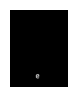

8 26: area = 234.5 aspect ratio = 0.7666666666666667 perimeter = 162.81118214130402


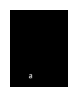

8 27: area = 260.5 aspect ratio = 0.8 perimeter = 150.18376553058624


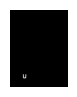

8 29: area = 300.0 aspect ratio = 0.8333333333333334 perimeter = 152.76955199241638


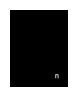

8 33: area = 280.0 aspect ratio = 0.8 perimeter = 152.28427076339722


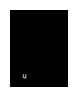

8 48: area = 277.0 aspect ratio = 0.7073170731707317 perimeter = 150.22539567947388


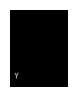

8 50: area = 572.0 aspect ratio = 1.0227272727272727 perimeter = 344.71067690849304


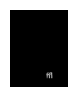

8 51: area = 682.5 aspect ratio = 1.0454545454545454 perimeter = 359.1543279886246


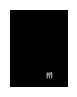

8 61: area = 758.5 aspect ratio = 13.75 perimeter = 229.89949476718903


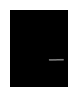

8 63: area = 770.0 aspect ratio = 13.875 perimeter = 234.0


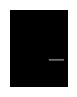

8 70: area = 55496.5 aspect ratio = 0.9442970822281167 perimeter = 2092.5512965917587


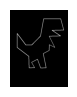

8 71: area = 56516.5 aspect ratio = 0.941952506596306 perimeter = 2133.6396092176437


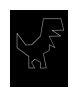

========Image-9=========
Original  \  Processed


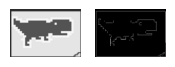

9 58: area = 149.0 aspect ratio = 0.010101010101010102 perimeter = 395.65685415267944


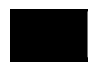

In [7]:
dino_files = glob('./imgs/dinos/*') #png gives an array of 0 and 1?
print(f"{len(dino_files)} files loades")



list_area = []
list_perimeter = []
list_aspect_ratio = []
list_approx = []

for index_img, file in enumerate(dino_files):
    img = cv.imread(file)
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    #blurred_image = cv.GaussianBlur(img_gray, (3, 3), 0)
    image_resized = cv.resize(img_gray, None, fx=0.60, fy=0.60)

    kernel_sharpening = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
    img_sharpened = cv.filter2D(image_resized, -1, kernel_sharpening)

    eightbit = np.uint8(np.absolute(img_sharpened))#8-bit vallues within range 0 to 255

    _, binary = cv.threshold(eightbit, 30, 255, cv.THRESH_BINARY)

    print(f"========Image-{index_img}=========")
    print("Original  \\  Processed")
    fig, ax = plt.subplots(1, 2, figsize=(2,1))
    ax[0].imshow(img)
    ax[1].imshow(binary, cmap='gray')
    ax[0].axis('off')
    ax[1].axis('off')
    plt.show()
    
    contours, hierarchy = cv.findContours(binary, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)#cv.RETR_EXTERNAL pega só o contorno mais externo 
    
    
    for index, contour in enumerate(contours):
        x, y, w, h = cv.boundingRect(contour)
        
        area = cv.contourArea(contour)
        aspect_ratio = w / float(h)
        perimeter = cv.arcLength(contour, True)
        approx = cv.approxPolyDP(contour, 0.01 * perimeter, True)
        
        if area > 10 and perimeter > 150:
            
            
            list_area.append(area)
            list_aspect_ratio.append(aspect_ratio)
            list_perimeter.append(perimeter)
            list_approx.append(approx)
            
            print(f"{index_img} {index}: area = {area} aspect ratio = {aspect_ratio} perimeter = {perimeter}")
            
            canvas = np.zeros_like(binary)
            cv.drawContours(canvas, [approx], -1, (255, 255, 255), thickness=2)
            
            fig, ax = plt.subplots(figsize=(1, 1))
            ax.imshow(canvas, cmap='gray')
            ax.axis('off')
            plt.show()
    print(f"========================")


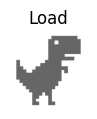

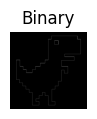

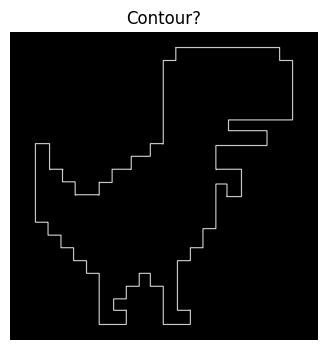

In [52]:
def get_contours_reference_objects(image):
        img_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        blurred_image = cv.medianBlur(img_gray, 1)
        kernel_sharpening = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
        img_sharpened = cv.filter2D(blurred_image, -1, kernel_sharpening)
        eightbit = np.uint8(np.absolute(img_sharpened))#8-bit vallues within range 0 to 255

        _, binary = cv.threshold(eightbit, 30, 255, cv.THRESH_BINARY)
        
        
        fig, ax = plt.subplots(figsize=(1,1))
        ax.imshow(binary, cmap='gray')
        ax.set_title('Binary')
        ax.axis('off')
        plt.show()
        
        
        contours, hierarchy = cv.findContours(binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)     
        return contours
    
def load_reference_contours(reference_images):
    reference_contours = {}
    for reference in reference_images:
        cv_image = cv.imread(reference_images[reference])
        
        fig, ax = plt.subplots(figsize=(1,1))
        ax.imshow(cv_image, cmap='gray')
        ax.set_title('Load')
        ax.axis('off')
        plt.show()
        
        if cv_image is not None:
            reference_contours[reference] = get_contours_reference_objects(cv_image)
        else:
            raise FileNotFoundError(f"Error: Image {reference_images[reference]} not found or could not be loaded.")
    return reference_contours

def draw_contour(reference_image_path, contours):
    # Load the original image
    image = cv.imread(reference_image_path)
    if image is None:
        raise FileNotFoundError(f"Error: Image {reference_image_path} not found or could not be loaded.")
    for contour in contours:
        canvas = np.zeros_like(image)
        cv.drawContours(canvas, [contour], -1, (255, 255, 255), thickness=2)
                
        fig, ax = plt.subplots(figsize=(4, 4))
        ax.imshow(canvas)
        ax.set_title('Contour?')
        ax.axis('off')
        plt.show()

reference_images = {"dino_up": "imgs/dinos/dino_up-2.png"}
reference_contours = load_reference_contours(reference_images)

#print(reference_contours['dino_up'])

draw_contour(reference_images["dino_up"], contours = reference_contours["dino_up"])
